## Load df

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

#TODO: argument for dataset folder name
dataset_dir = os.path.join(features_dir, "music_audio_benchmark")

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [3]:
print("=== ORIGINAL DF ===")
df = pd.read_csv(csv_file_path)
display(df.head())

feature_columns =[
        'name', 'duration', 'tempo', 
        'chroma_key', 'mean_root_square_mean', 'mean_zero_crossing_rate', 
        'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off', 
        'label'
    ]

print("=== FEATURES ===")
df_features = df[feature_columns].copy()
display(df_features.head())

path_columns = [
    'name',
    'path', 'path_spectogram_img', 'path_spectogram_arr', 
    'path_mel_spectogram_img', 'path_mel_spectogram_arr', 'path_chromagram_img',
    'path_chromagram_arr', 'path_mfccs_arr', 'label'
]

print("=== PATHS ===")
df_paths = df[path_columns].copy()
display(df_paths.head())

=== ORIGINAL DF ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


=== FEATURES ===


,name,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_centroid,mean_spectral_bandwith,mean_spectral_roll_off,label
0,50_Minutes-Colours,10.057,76.000,B,0.190,0.022,1655.830,2608.513,3622.496,alternative
1,50_Minutes-Nightwalk,10.057,123.047,F,0.118,0.017,866.198,1545.713,1512.838,alternative
2,50_Minutes-The_Great_Wall,10.057,132.512,C,0.203,0.024,1402.899,2211.316,2953.923,alternative
3,Abigail_Lapell-Dress_Rehearsal,10.057,143.555,G,0.123,0.045,2218.057,2839.679,4639.921,alternative
4,Albino_Catfish-Ice_Cream,10.057,132.512,C#,0.153,0.074,2667.951,2712.802,5195.016,alternative


=== PATHS ===


,name,path,path_spectogram_img,path_spectogram_arr,path_mel_spectogram_img,path_mel_spectogram_arr,path_chromagram_img,path_chromagram_arr,path_mfccs_arr,label
0,50_Minutes-Colours,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
1,50_Minutes-Nightwalk,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
2,50_Minutes-The_Great_Wall,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
3,Abigail_Lapell-Dress_Rehearsal,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative
4,Albino_Catfish-Ice_Cream,C:\users\user\studia\audio_clustering_autoenco...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,..\features\music_audio_benchmark\alternative\...,alternative


In [60]:
path_arr_columns = [
    'path_spectogram_arr',
    'path_mel_spectogram_arr',
    'path_chromagram_arr',
    'path_mfccs_arr'
]


def load_numpy_array(path):
    return np.load(path)


def calculate_mean(path):
    arr = load_numpy_array(path)
    return np.mean(arr)


def calculate_mean_across_column(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=1)

In [61]:
# for column in path_arr_columns:
#     path = df_paths[column][0]
#     n_arr = load_numpy_array(path)
#     print(n_arr.shape)
    
#     mean_n_arr = calculate_mean_across_column(path)
#     print(mean_n_arr.shape)
    
#     if column == 'path_spectogram_arr':
#         print(mean_n_arr)

In [73]:
def get_mean_df():
    mean_df = pd.DataFrame()

    for column in path_arr_columns:
        mean_column_name = column.replace('path', 'mean')
        mean_column_name = mean_column_name.replace('_arr', '')
        mean_df[mean_column_name] = df_paths[column].apply(
            lambda path: calculate_mean(path)
        )

#     print("=== MEAN PATHS ===")
#     print(mean_df)
    return mean_df

def get_mean_by_column_df(column_name):    
    means_series = df_paths[column_name].apply(calculate_mean_across_column) 
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

In [74]:
# mean_df = get_mean_df()
spectogram_mean_column_df = get_mean_by_column_df('path_spectogram_arr')
spectogram_mean_column_df.head()

,path_spectogram_arr_0,path_spectogram_arr_1,path_spectogram_arr_2,path_spectogram_arr_3,path_spectogram_arr_4,path_spectogram_arr_5,path_spectogram_arr_6,path_spectogram_arr_7,path_spectogram_arr_8,path_spectogram_arr_9,...,path_spectogram_arr_1015,path_spectogram_arr_1016,path_spectogram_arr_1017,path_spectogram_arr_1018,path_spectogram_arr_1019,path_spectogram_arr_1020,path_spectogram_arr_1021,path_spectogram_arr_1022,path_spectogram_arr_1023,path_spectogram_arr_1024
0,-46.693478,-36.710743,-29.138111,-22.230059,-17.215614,-17.934860,-19.566767,-26.293854,-27.989149,-24.999796,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
1,-24.748405,-25.880041,-25.304487,-15.180512,-17.088261,-28.884970,-21.738504,-16.464916,-13.215202,-16.865158,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
2,-22.063433,-27.213539,-28.187662,-23.229757,-24.322437,-20.418894,-18.185106,-17.236507,-18.666929,-20.325787,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
3,-45.041443,-42.370739,-45.480221,-41.805782,-30.245409,-26.902470,-28.525972,-28.460987,-23.027470,-22.242481,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0
4,-51.686333,-48.130844,-48.093014,-44.554066,-32.014034,-25.424837,-25.090065,-30.025457,-32.201698,-26.902369,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0


In [6]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [7]:
show_df_summary(df)


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     1886 non-null   object 
 1   duration                 1886 non-null   float64
 2   tempo                    1886 non-null   float64
 3   chroma_key               1886 non-null   object 
 4   mean_root_square_mean    1886 non-null   float64
 5   mean_zero_crossing_rate  1886 non-null   float64
 6   mean_spectral_centroid   1886 non-null   float64
 7   mean_spectral_bandwith   1886 non-null   float64
 8   mean_spectral_roll_off   1886 non-null   float64
 9   path                     1886 non-null   object 
 10  path_spectogram_img      1886 non-null   object 
 11  path_spectogram_arr      1886 non-null   object 
 12  path_mel_spectogram_img  1886 non-null   object 
 13  path_mel_spectogram_arr  1886 non-null   object 
 14  

## Prepare data for clustering

In [78]:
from sklearn.preprocessing import MinMaxScaler
import re

In [9]:
num_labels = df['label'].nunique()
num_labels

9

### MinMaxScaler

In [80]:
df_to_cluster = df_features.drop(columns=['name', 'label', 'mean_spectral_centroid', 'mean_spectral_roll_off'])
df_to_cluster = pd.concat([df_to_cluster, mean_df], axis=1)
df_to_cluster = pd.concat([df_to_cluster, spectogram_mean_column_df], axis=1)

labels = df_features['label']

unique_chroma_key_values = df_to_cluster['chroma_key'].unique()
mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
df_to_cluster['chroma_key'] = df_to_cluster['chroma_key'].map(mapping_dict_chroma)

columns_to_normalize = [
    'duration', 'tempo', 
    'mean_root_square_mean', 'mean_zero_crossing_rate', 'mean_spectral_bandwith',
    'mean_spectogram', 'mean_mel_spectogram', 'mean_chromagram', 'mean_mfccs'
]

path_pattern = re.compile(r'^path_.*_arr_.*$') # path_*_arr_
columns_to_normalize += [col for col in df_to_cluster.columns if path_pattern.match(col)]

scaler = MinMaxScaler()
df_to_cluster[columns_to_normalize] = scaler.fit_transform(df_to_cluster[columns_to_normalize])
df_to_cluster

,duration,tempo,chroma_key,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_bandwith,mean_spectogram,mean_mel_spectogram,mean_chromagram,mean_mfccs,...,path_spectogram_arr_1015,path_spectogram_arr_1016,path_spectogram_arr_1017,path_spectogram_arr_1018,path_spectogram_arr_1019,path_spectogram_arr_1020,path_spectogram_arr_1021,path_spectogram_arr_1022,path_spectogram_arr_1023,path_spectogram_arr_1024
0,1.0,0.043163,0,0.379775,0.079755,0.484756,0.401374,0.236131,0.568602,0.803125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.433232,1,0.217978,0.049080,0.232146,0.315557,0.371923,0.405569,0.671414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.0,0.511707,2,0.408989,0.092025,0.390349,0.370109,0.368109,0.570913,0.831477,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.603265,3,0.229213,0.220859,0.539701,0.441222,0.279804,0.253823,0.584212,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,0.511707,4,0.296629,0.398773,0.509544,0.535915,0.422165,0.236490,0.565638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,1.0,0.433232,6,0.503371,0.337423,0.478506,0.697934,0.743330,0.493638,0.842047,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1882,1.0,0.795236,11,0.471910,0.312883,0.700748,0.693023,0.430814,0.697980,0.920294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1883,1.0,0.287492,5,0.438202,0.331288,0.686360,0.718755,0.430989,0.533875,0.873784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1884,1.0,0.344518,5,0.732584,0.564417,0.758235,0.872136,0.640410,0.516986,0.963549,...,0.002608,0.005678,0.007339,0.005384,0.002596,0.001887,0.001749,0.003111,0.003471,0.003747


### One hot encoding for categorical

In [81]:
df_to_cluster['chroma_key'] = df_to_cluster['chroma_key'].astype('category')
df_to_cluster = pd.get_dummies(df_to_cluster, columns=['chroma_key'], dtype=float)
df_to_cluster

,duration,tempo,mean_root_square_mean,mean_zero_crossing_rate,mean_spectral_bandwith,mean_spectogram,mean_mel_spectogram,mean_chromagram,mean_mfccs,path_spectogram_arr_0,...,chroma_key_2,chroma_key_3,chroma_key_4,chroma_key_5,chroma_key_6,chroma_key_7,chroma_key_8,chroma_key_9,chroma_key_10,chroma_key_11
0,1.0,0.043163,0.379775,0.079755,0.484756,0.401374,0.236131,0.568602,0.803125,0.378441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.433232,0.217978,0.049080,0.232146,0.315557,0.371923,0.405569,0.671414,0.675340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.511707,0.408989,0.092025,0.390349,0.370109,0.368109,0.570913,0.831477,0.711666,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.603265,0.229213,0.220859,0.539701,0.441222,0.279804,0.253823,0.584212,0.400792,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.511707,0.296629,0.398773,0.509544,0.535915,0.422165,0.236490,0.565638,0.310892,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,1.0,0.433232,0.503371,0.337423,0.478506,0.697934,0.743330,0.493638,0.842047,0.420520,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1882,1.0,0.795236,0.471910,0.312883,0.700748,0.693023,0.430814,0.697980,0.920294,0.458000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1883,1.0,0.287492,0.438202,0.331288,0.686360,0.718755,0.430989,0.533875,0.873784,0.412748,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,1.0,0.344518,0.732584,0.564417,0.758235,0.872136,0.640410,0.516986,0.963549,0.471585,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: True
matplotlib backend: module://matplotlib_inline.backend_inline


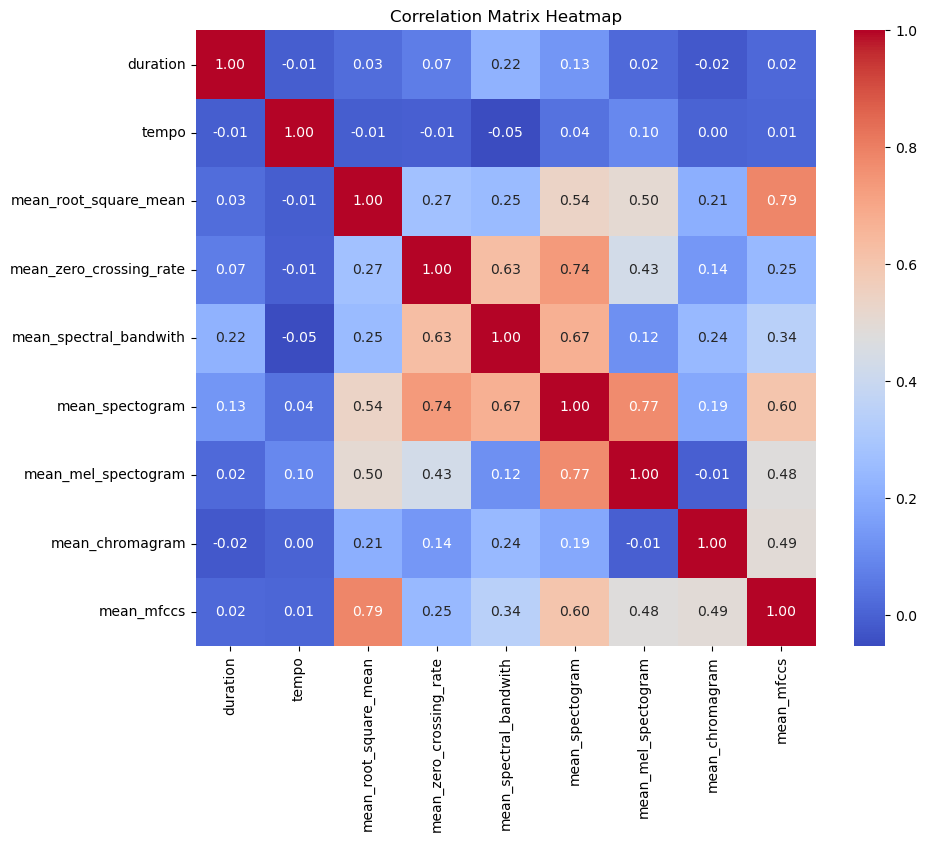

In [87]:
# Filter chroma key and path_*_arr_ in correlation analysis
df_correlation = df_to_cluster.filter(regex='^(?!chroma_key)').filter(regex='^(?!path_.*_arr_.*$)')
df_correlation
correlation_matrix = df_correlation.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

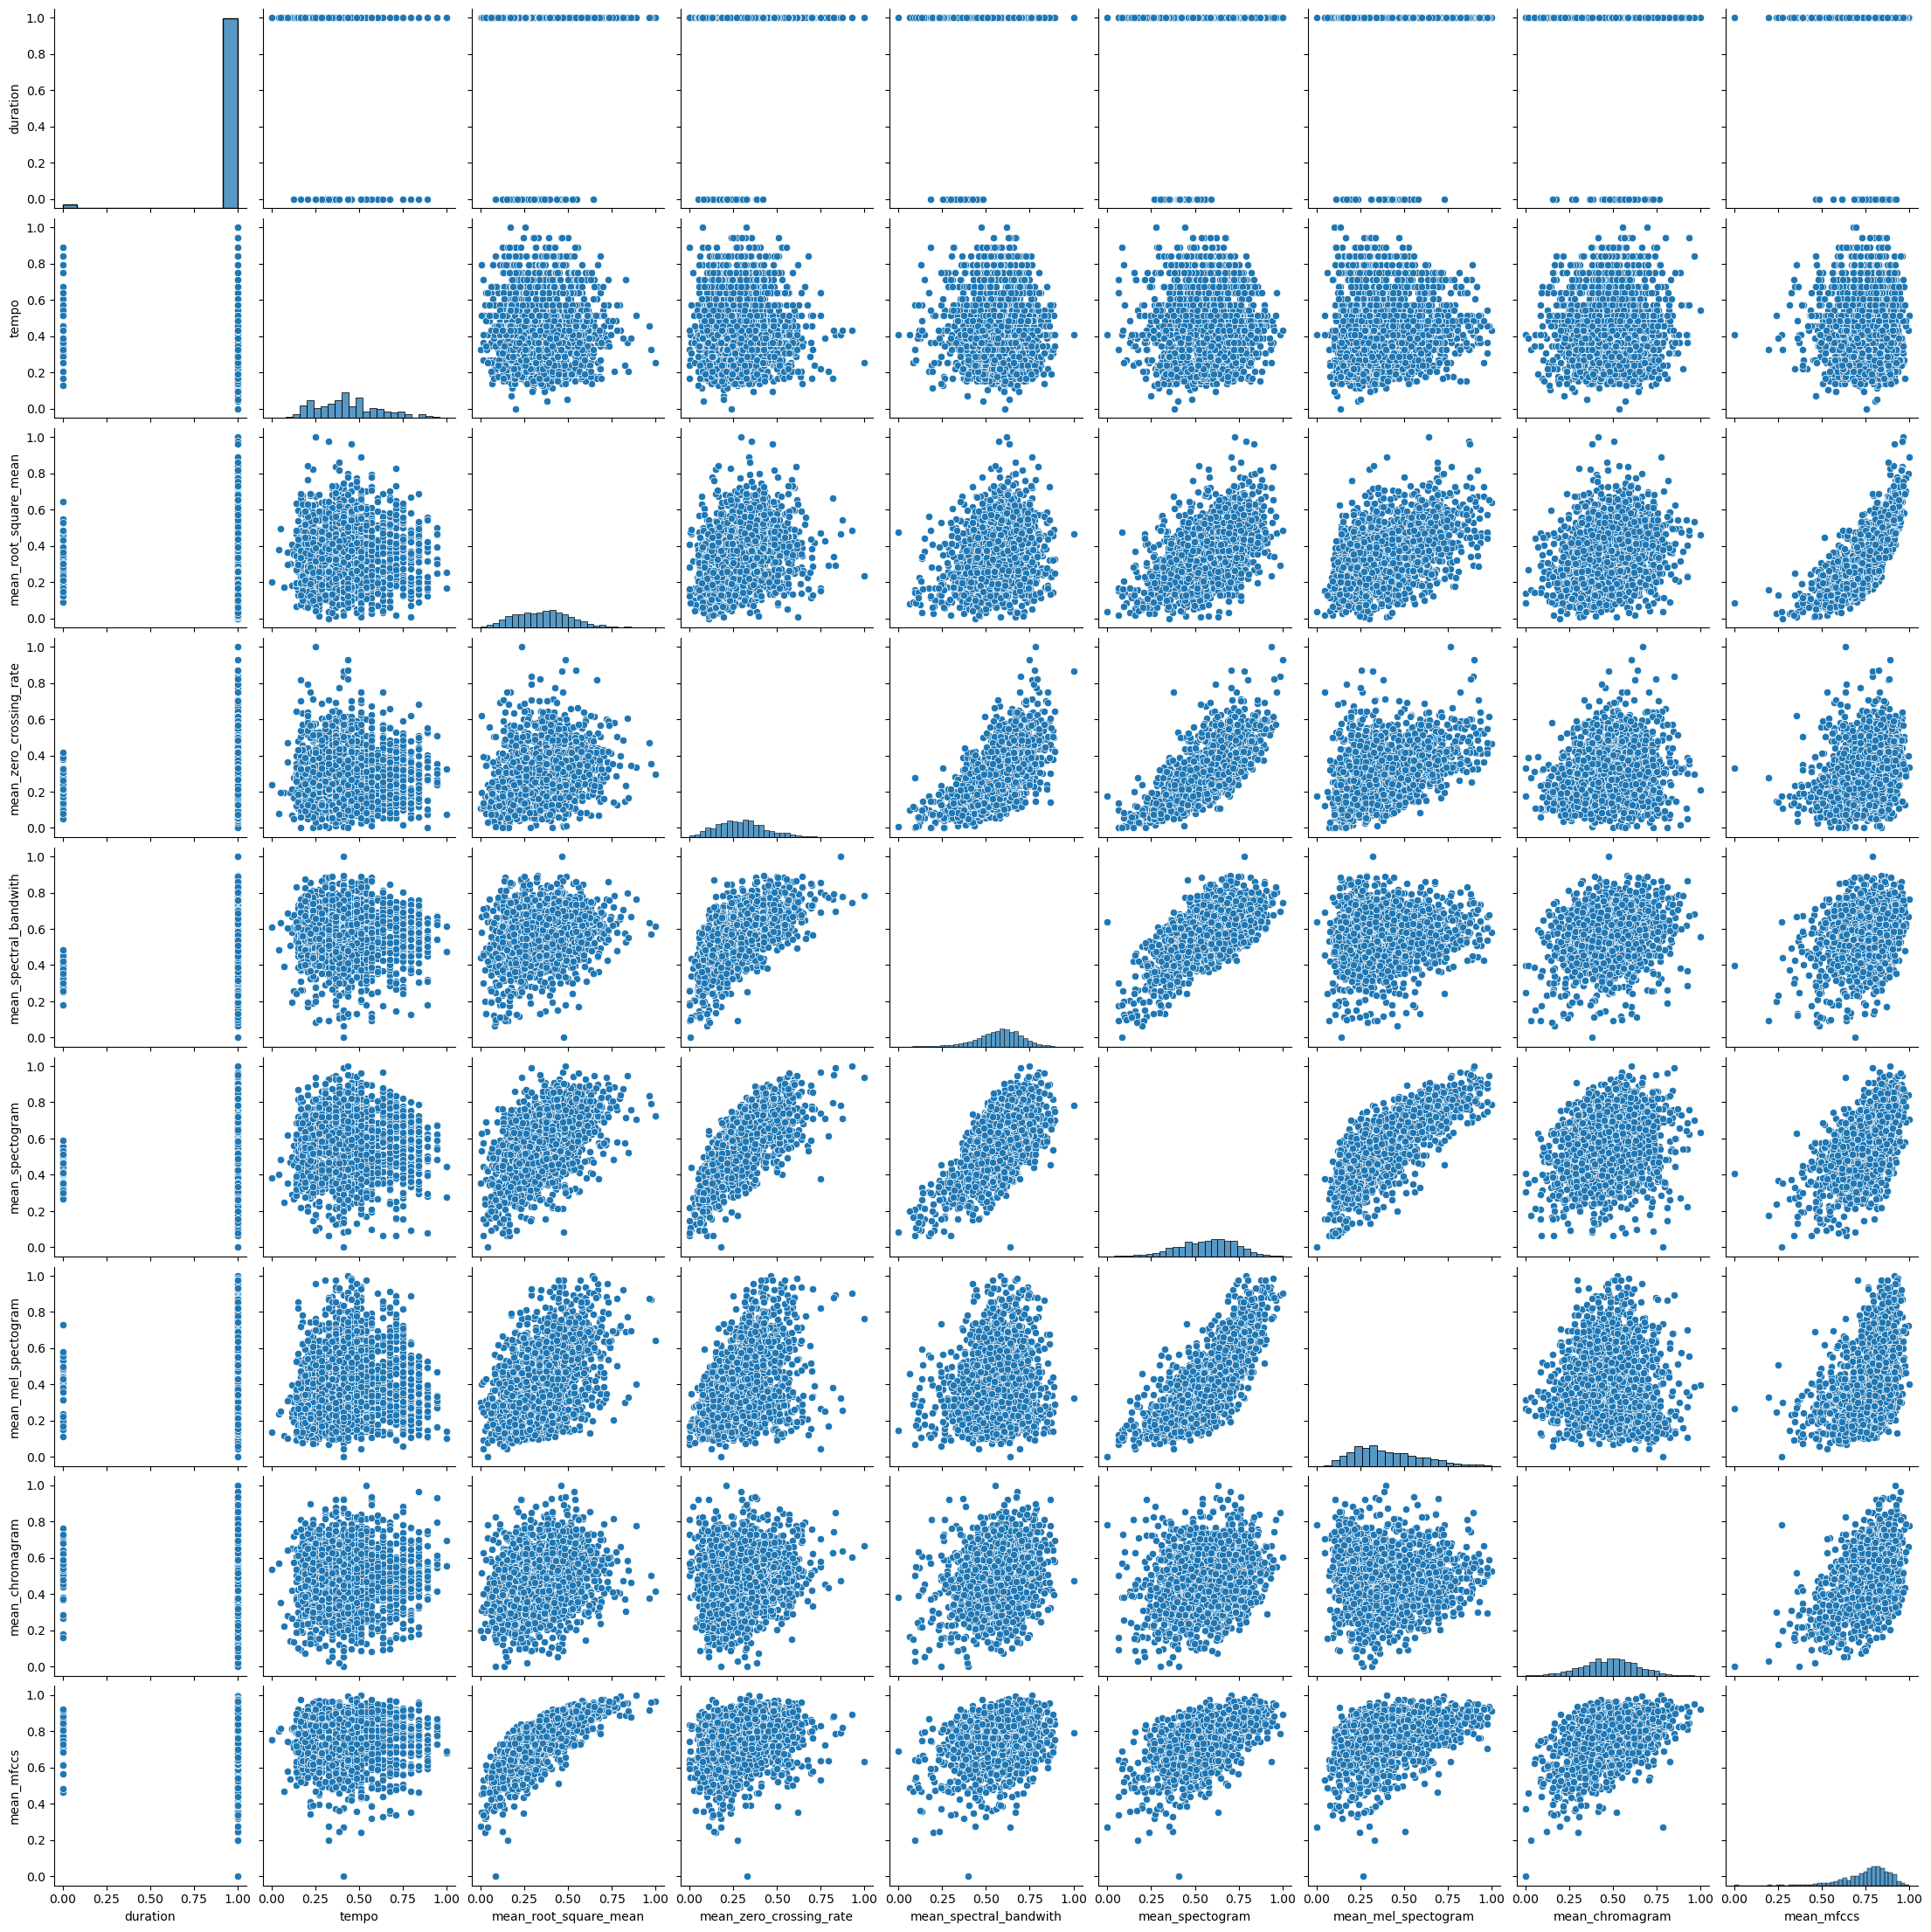

In [14]:
# filter columns that start with chroma_key_
sns.pairplot(df_correlation)
plt.show()

## PCA

In [88]:
from sklearn.decomposition import PCA

In [89]:
df_to_cluster.shape

(1886, 1046)

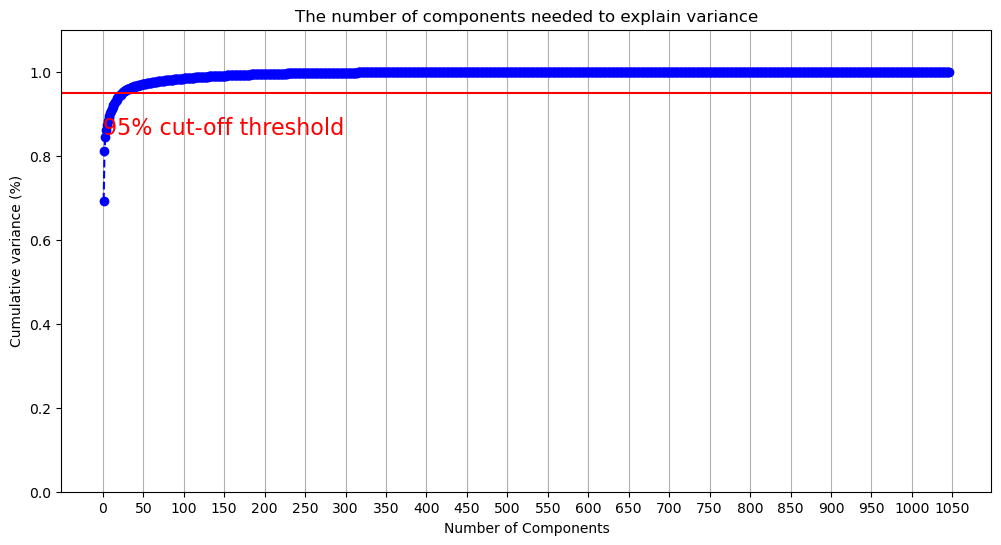

In [106]:
pca = PCA().fit(df_to_cluster)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, df_to_cluster.shape[1] + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, df_to_cluster.shape[1] + 50, step=50))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [123]:
N_COMPONENTS = 25

pca = PCA(n_components=N_COMPONENTS)
pca.fit(df_to_cluster)

explained_variance = pca.explained_variance_ratio_
# print(explained_variance[:10])
print("Sum of Explained Variance:", sum(explained_variance))

Sum of Explained Variance: 0.9515559693461205


In [126]:
pca_data = pca.transform(df_to_cluster)
pca_columns = [f'PCA_{i + 1}' for i in range(N_COMPONENTS)]
df_to_cluster = pd.DataFrame(data=pca_data, columns=pca_columns)

df_to_cluster

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25
0,4.279416,0.136533,-0.575094,0.222257,-0.053226,-0.124691,0.362288,-0.225055,0.044350,-0.271231,...,0.015388,0.119878,0.091078,0.082319,0.088791,-0.116696,0.074134,0.038453,0.043276,-0.323703
1,6.944807,0.758083,0.662474,-0.043406,0.343190,-0.088975,0.407523,-0.181740,-0.003835,-0.141183,...,-0.330408,0.527930,0.194919,-0.062142,-0.044526,-0.107675,-0.108008,-0.019144,0.068686,0.053704
2,5.323226,0.203530,0.856546,-0.375964,-0.157791,0.083920,-0.195981,-0.030805,0.115361,-0.242486,...,-0.174667,-0.061107,-0.007071,-0.063808,-0.100102,-0.013536,-0.095456,0.022371,-0.032690,-0.098531
3,3.175194,-0.508801,-0.305587,-0.692229,0.844218,-0.083062,-0.121013,0.465706,0.264024,-0.168473,...,-0.616996,-0.188661,0.443613,0.016669,-0.054379,-0.104003,0.086319,-0.136247,0.046705,-0.155387
4,0.960538,0.767555,-0.077406,0.085783,0.162358,0.163898,-0.385762,0.072098,0.046071,-0.135097,...,0.658818,0.032848,-0.682863,-0.601335,0.179451,0.298836,0.033251,0.424859,0.588006,1.228453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,-2.472435,2.210513,1.382760,-0.582017,-0.405654,0.001850,-0.391734,-0.011038,0.353828,0.895502,...,0.025297,-0.044235,0.289765,0.122105,-0.025440,-0.122689,0.091890,-0.100515,0.057059,-0.037492
1882,-3.142544,1.057338,-2.708696,-1.444415,-0.862329,0.667653,0.301726,-0.978563,-0.104698,-0.109630,...,0.149365,-0.410880,-0.413362,-0.028769,-0.729807,-0.544738,-0.377568,-0.242698,-0.179092,0.261436
1883,-3.828087,0.060226,-0.448286,-0.179155,-0.402466,-0.210146,0.063339,0.424667,-0.762965,0.250100,...,-0.101674,-0.053151,-0.062515,0.024593,0.003989,-0.059198,-0.041551,-0.004834,0.015606,0.047911
1884,-7.907215,-0.566197,-0.770720,-0.245941,-0.072254,-0.282754,0.142756,0.543260,-0.691868,0.192627,...,-0.227079,0.084606,-0.402679,0.068601,-0.166711,0.094865,-0.018167,0.089337,-0.008766,0.049849


## Get number of clusters

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Elbow method

In [128]:
def elbow_method(X, max_clusters):
    inertia = list()
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters = i, n_init='auto')
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(range(2, max_clusters), inertia)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

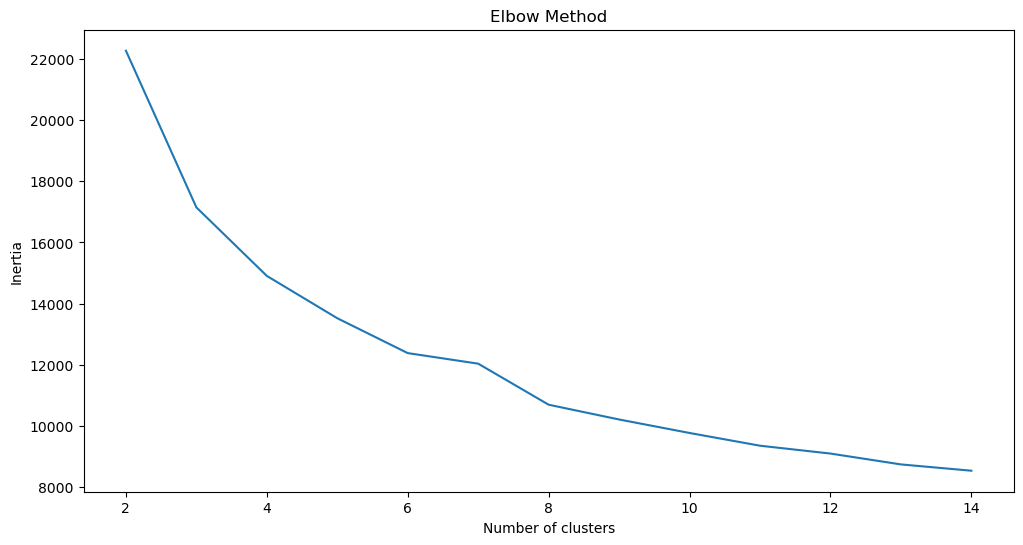

In [129]:
elbow_method(df_to_cluster, 15)

### Silhouette analysis

In [130]:
def silhouette_analysis(X, max_clusters):
    range_n_clusters =  list(range(2, max_clusters + 1))
    
    best_score = -1
    best_score_clusters = -1
    
    for n_clusters in range_n_clusters:
        fig, ax1 = plt.subplots()
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=23, n_init='auto')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f'For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}')
        if (silhouette_avg > best_score):
            best_score = silhouette_avg
            best_score_clusters = n_clusters
            
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10


        ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #     ax2.scatter(
    #         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    #     )

    #     centers = clusterer.cluster_centers_
    #     ax2.scatter(
    #         centers[:, 0],
    #         centers[:, 1],
    #         marker="o",
    #         c="white",
    #         alpha=1,
    #         s=200,
    #         edgecolor="k",
    #     )

    #     for i, c in enumerate(centers):
    #         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    #     ax2.set_title("The visualization of the clustered data.")
    #     ax2.set_xlabel("Feature space for the 1st feature")
    #     ax2.set_ylabel("Feature space for the 2nd feature")

    #     plt.suptitle(
    #         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    #         % n_clusters,
    #         fontsize=14,
    #         fontweight="bold",
    #     )


    plt.show()
    return best_score_clusters, best_score

For n_clusters = 2, The average silhouette_score is : 0.3937883911433509
For n_clusters = 3, The average silhouette_score is : 0.2869028543937279
For n_clusters = 4, The average silhouette_score is : 0.22678953243445493
For n_clusters = 5, The average silhouette_score is : 0.21771582391757063
For n_clusters = 6, The average silhouette_score is : 0.19923273304613567
For n_clusters = 7, The average silhouette_score is : 0.19497397464434396
For n_clusters = 8, The average silhouette_score is : 0.1933873793715885
For n_clusters = 9, The average silhouette_score is : 0.1870109833247437
For n_clusters = 10, The average silhouette_score is : 0.17449543312938665
For n_clusters = 11, The average silhouette_score is : 0.17229584600920875
For n_clusters = 12, The average silhouette_score is : 0.16029606515835795
For n_clusters = 13, The average silhouette_score is : 0.15661229324328324
For n_clusters = 14, The average silhouette_score is : 0.14839697543499955
For n_clusters = 15, The average silh

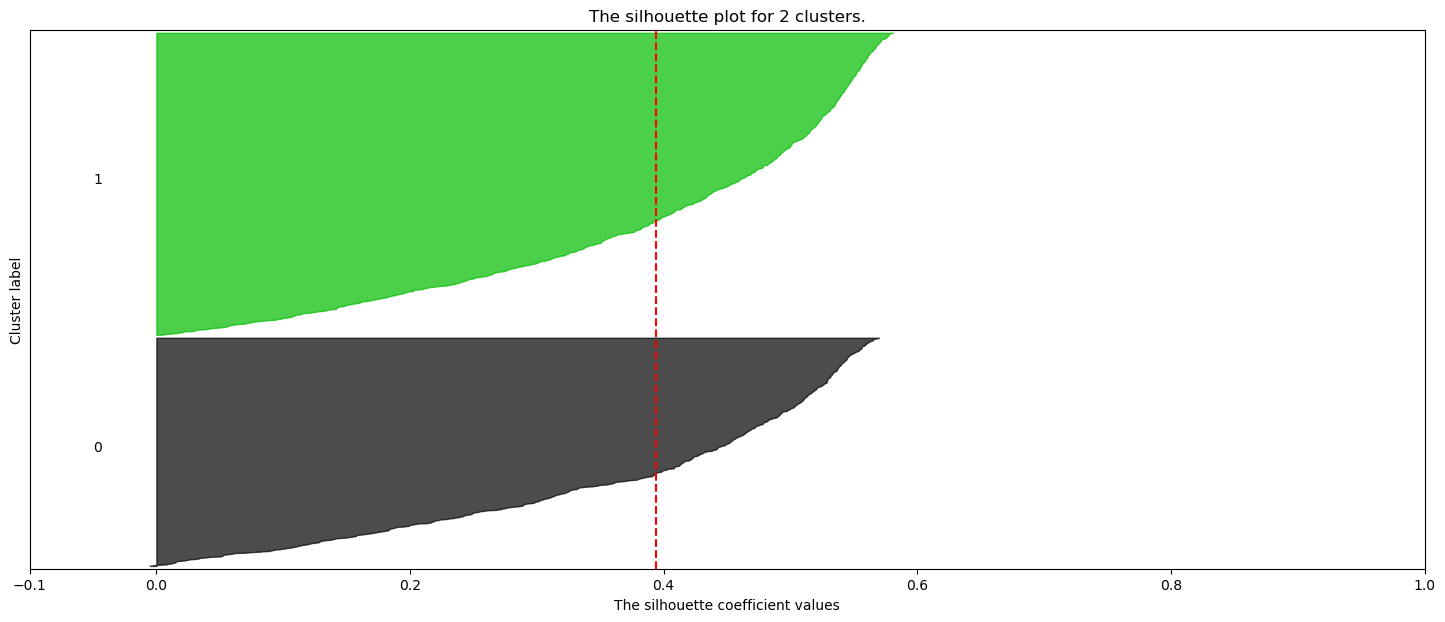

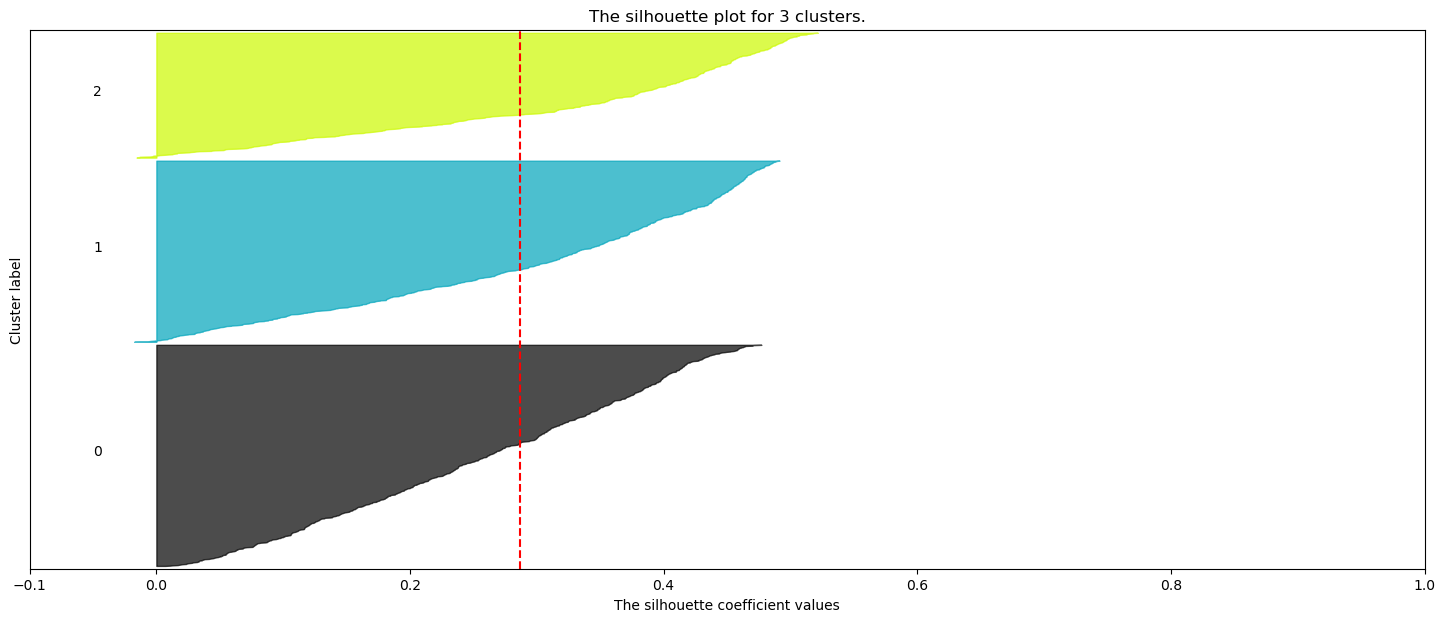

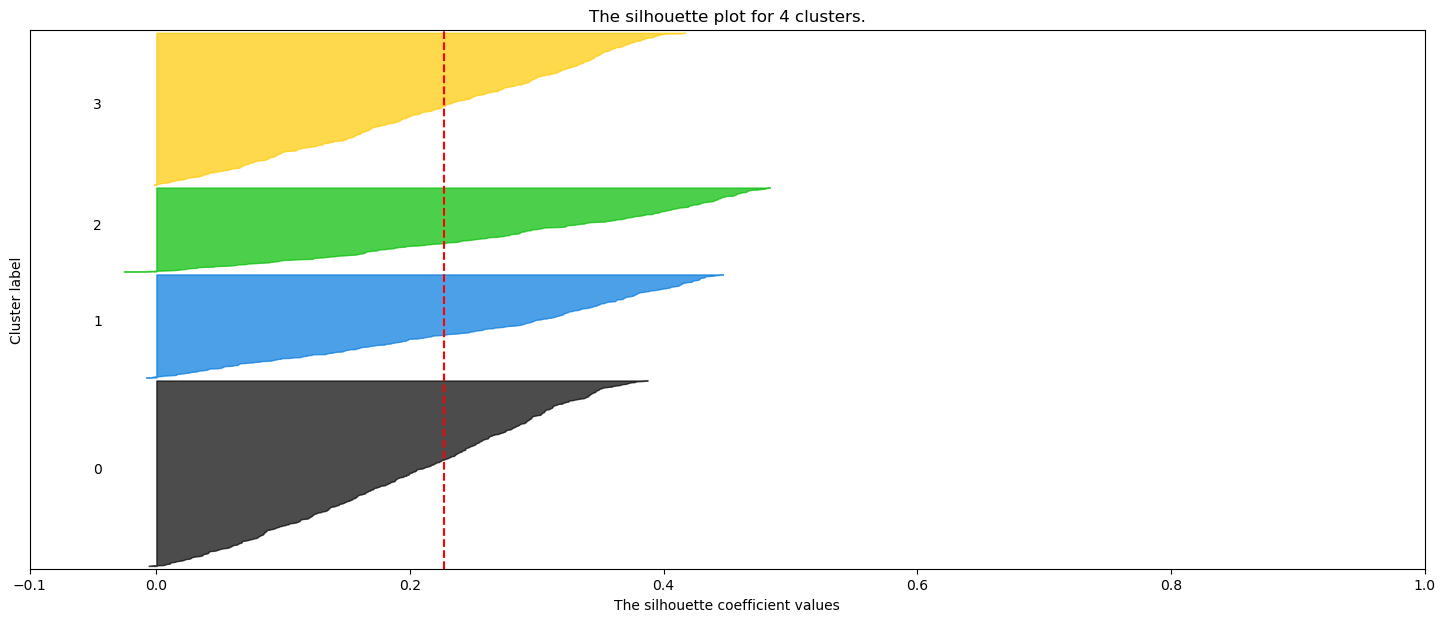

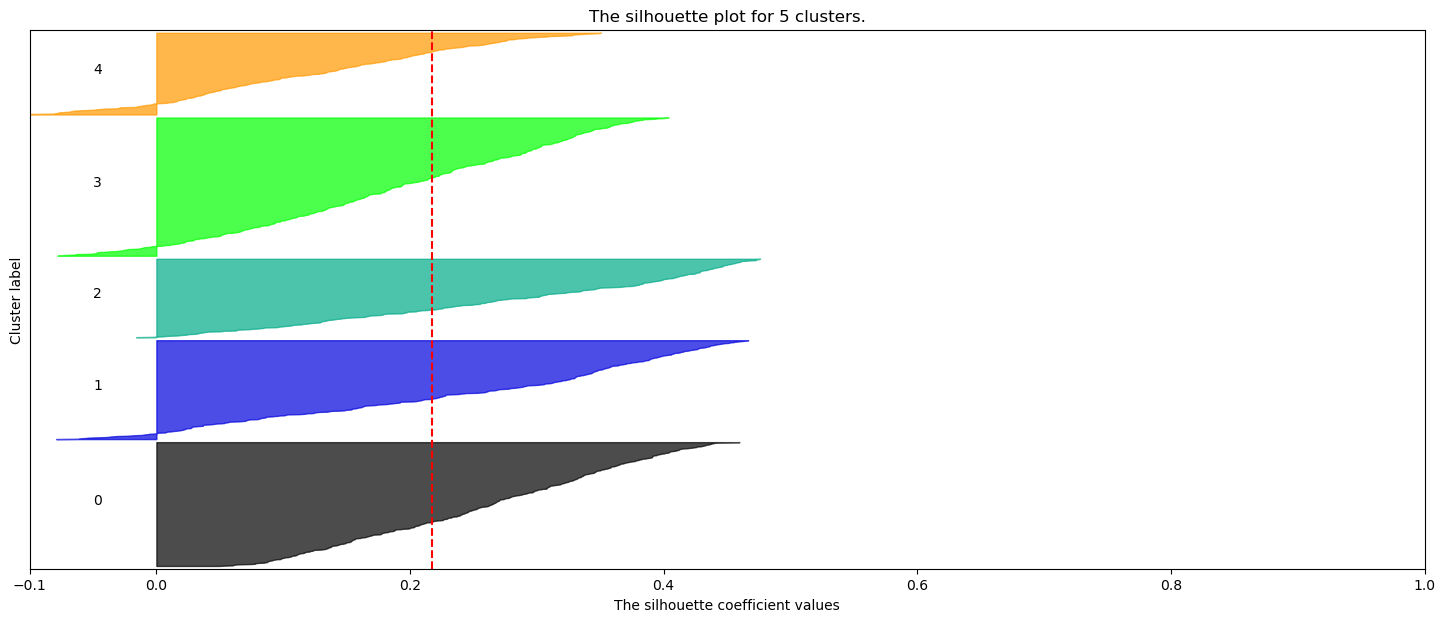

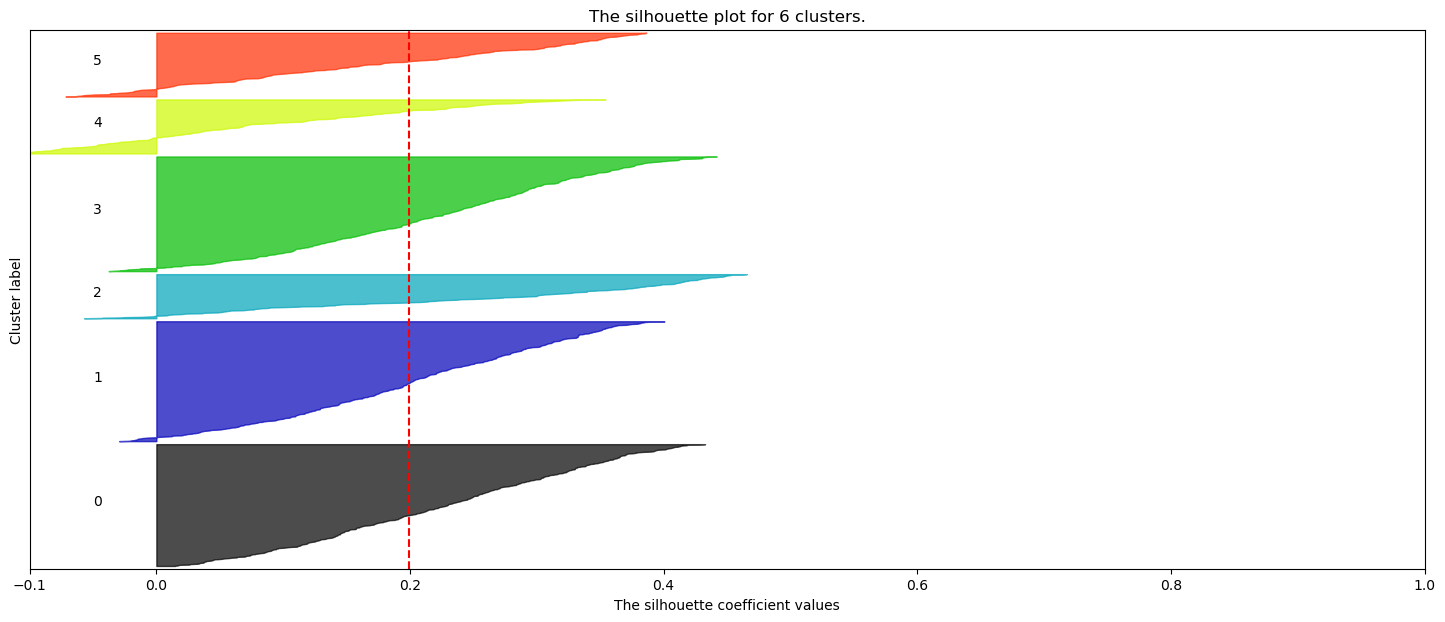

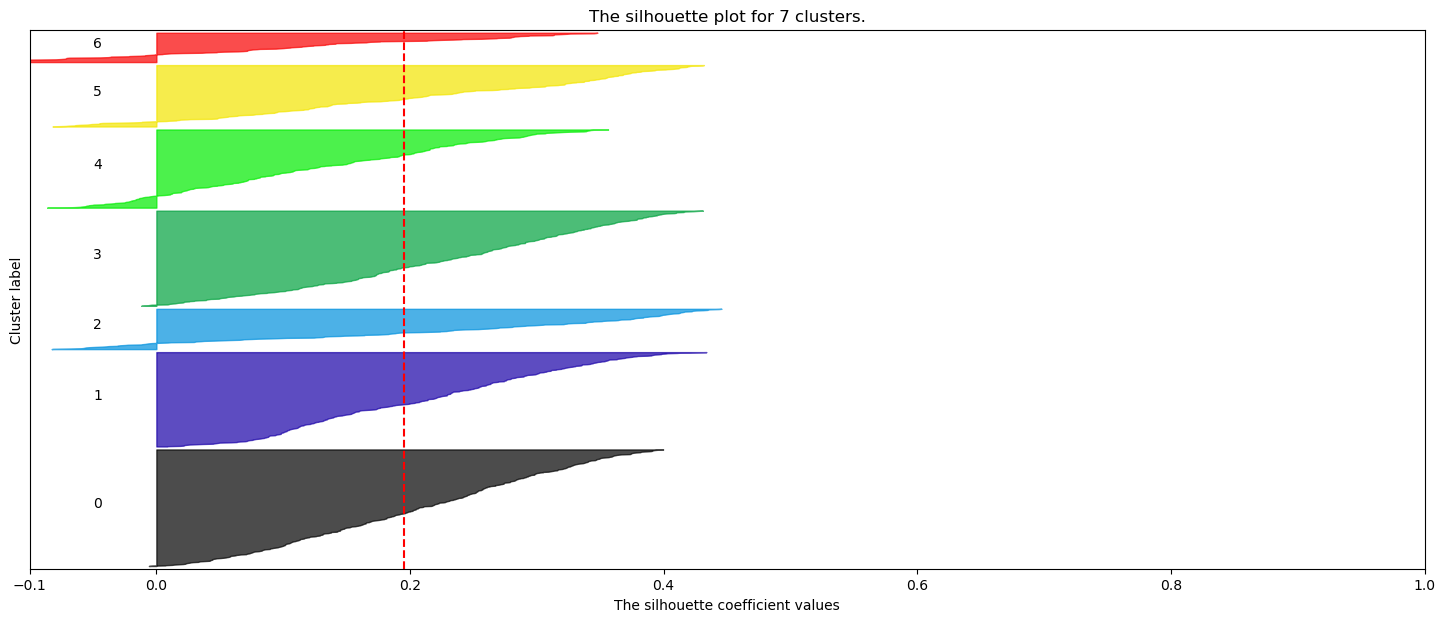

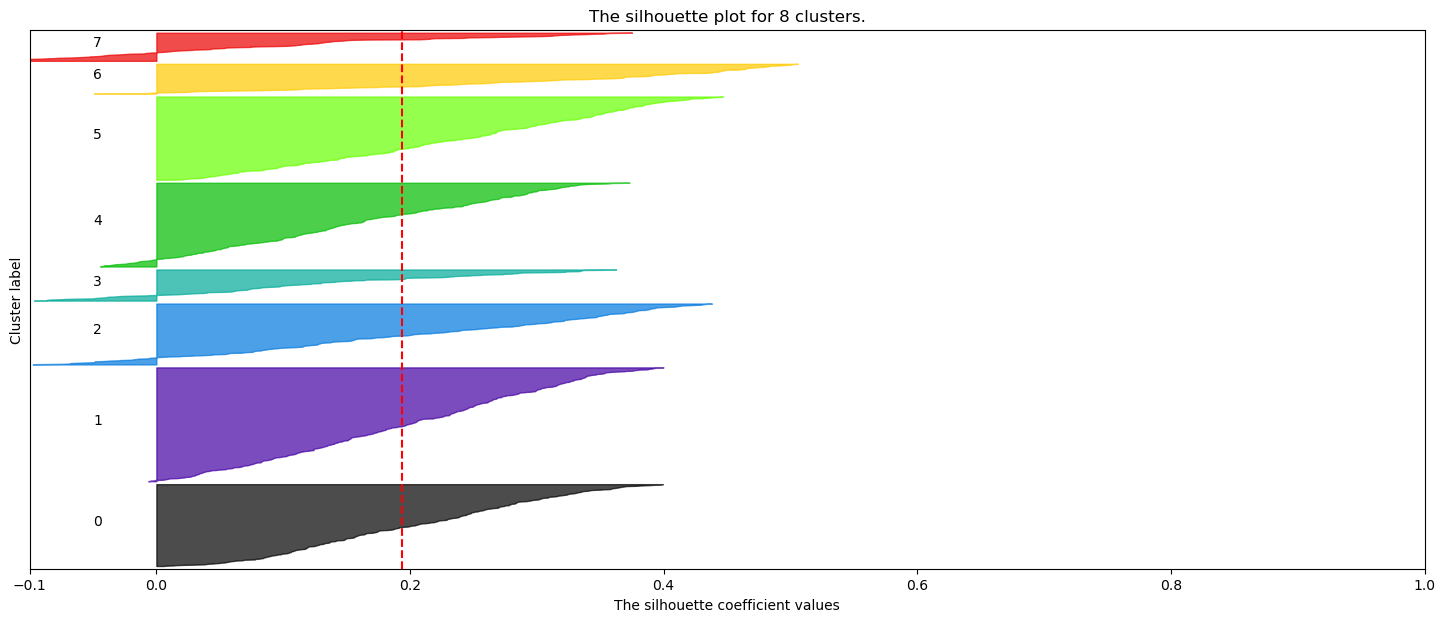

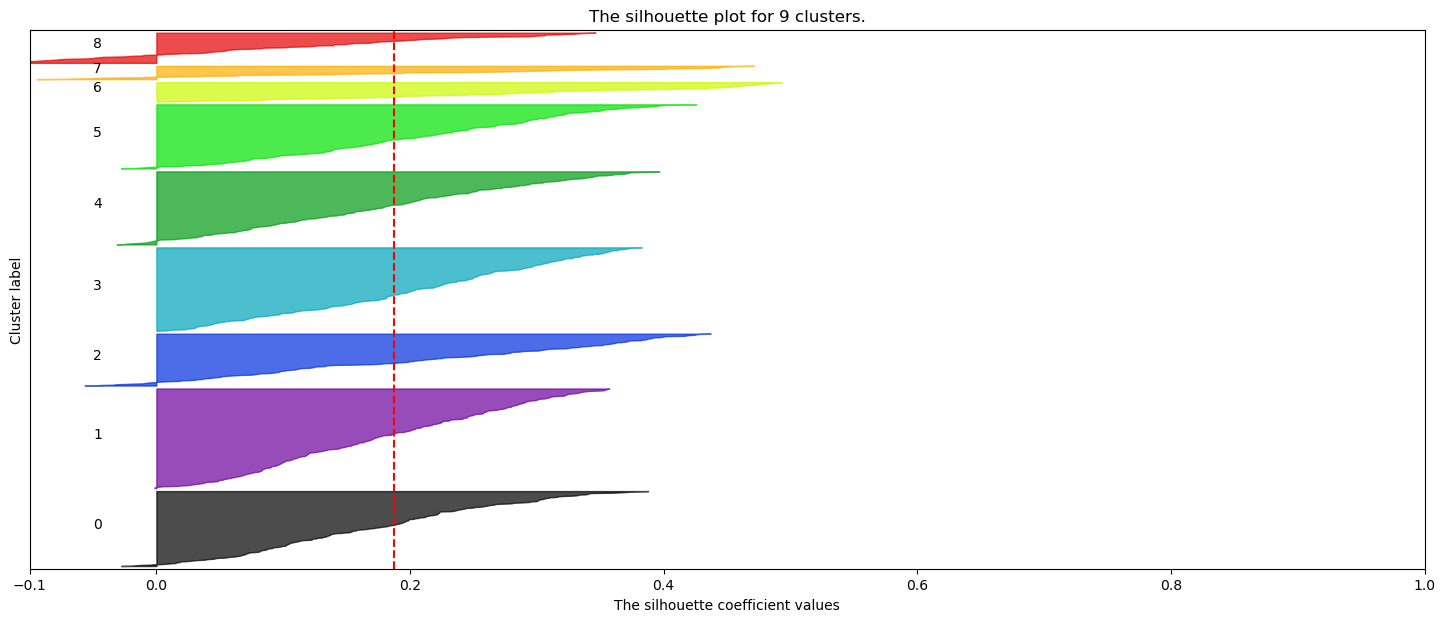

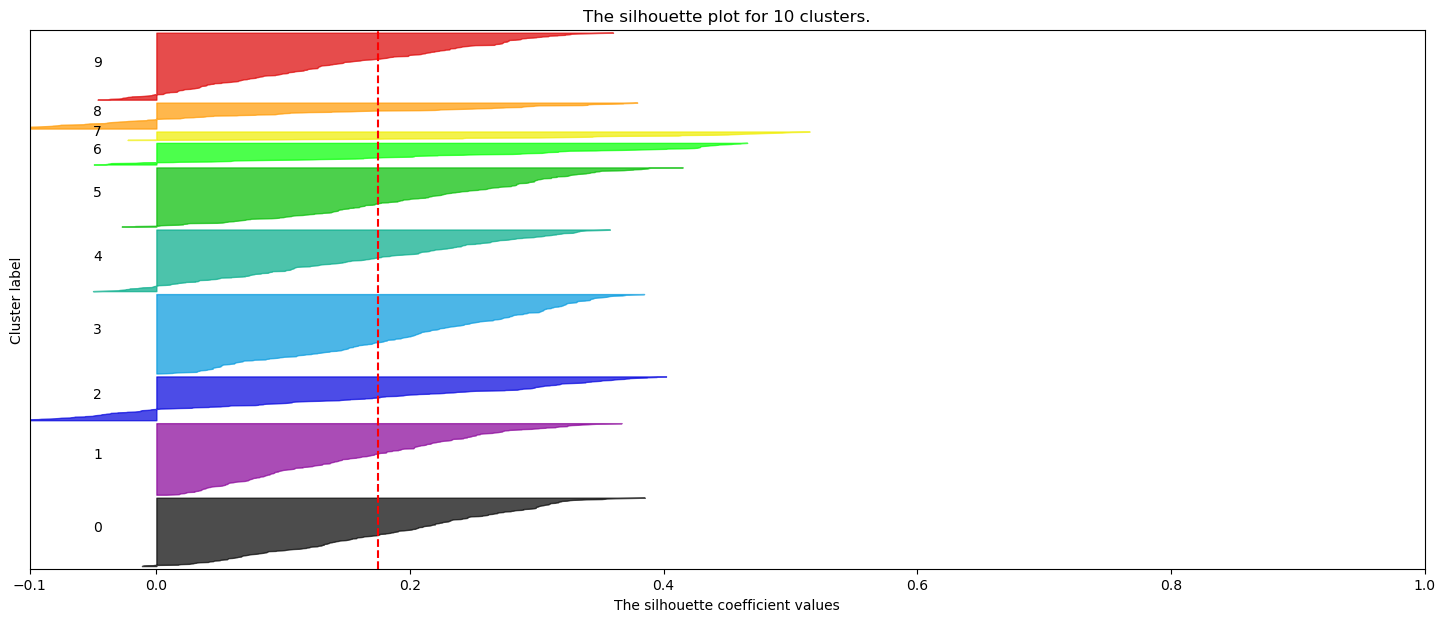

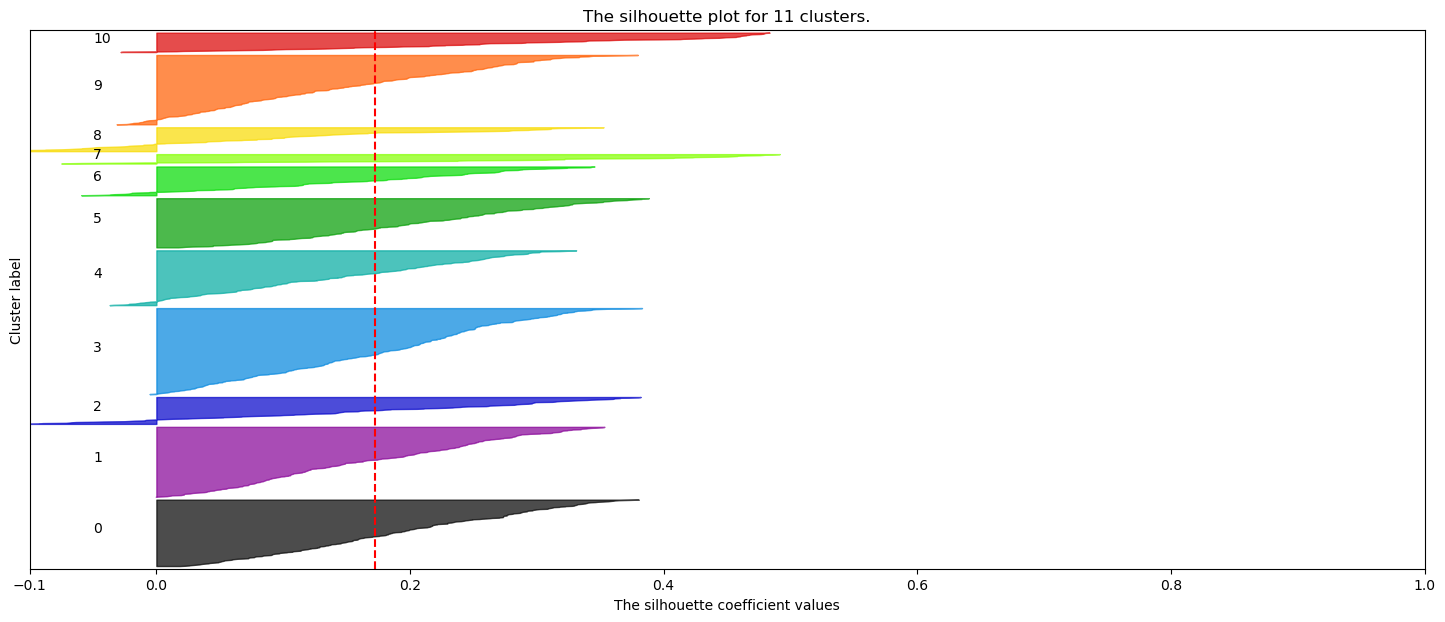

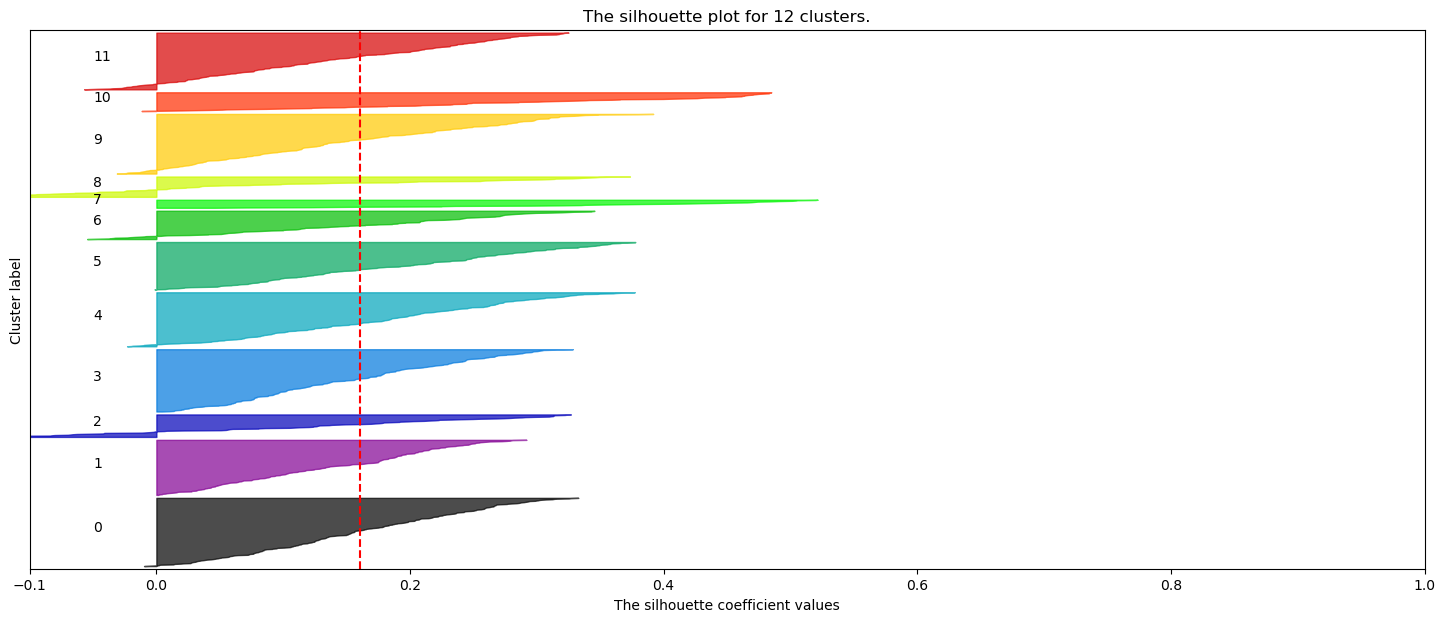

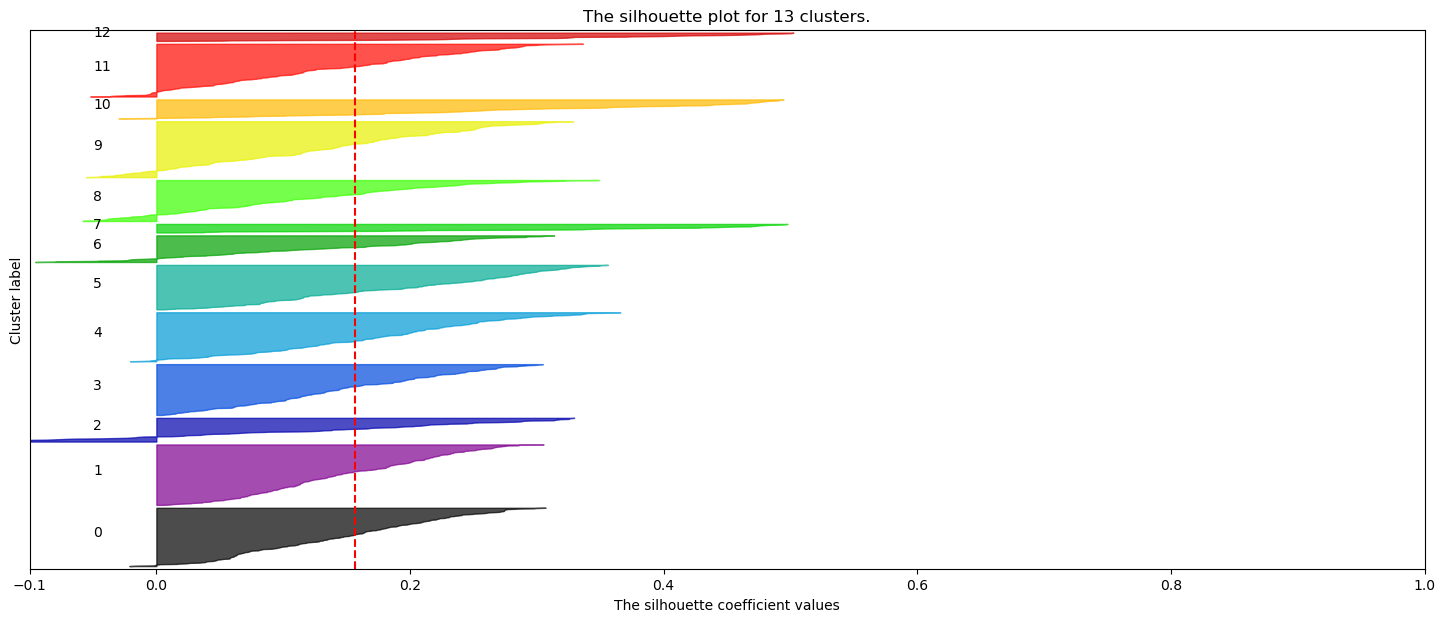

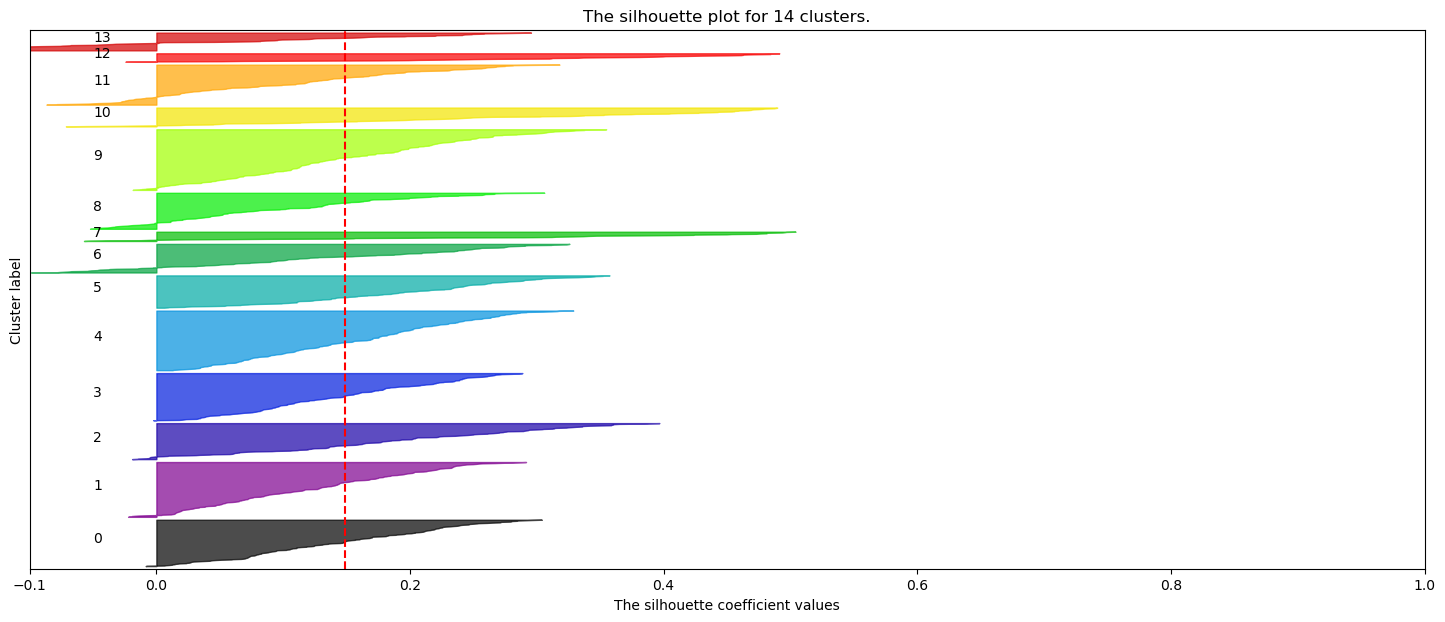

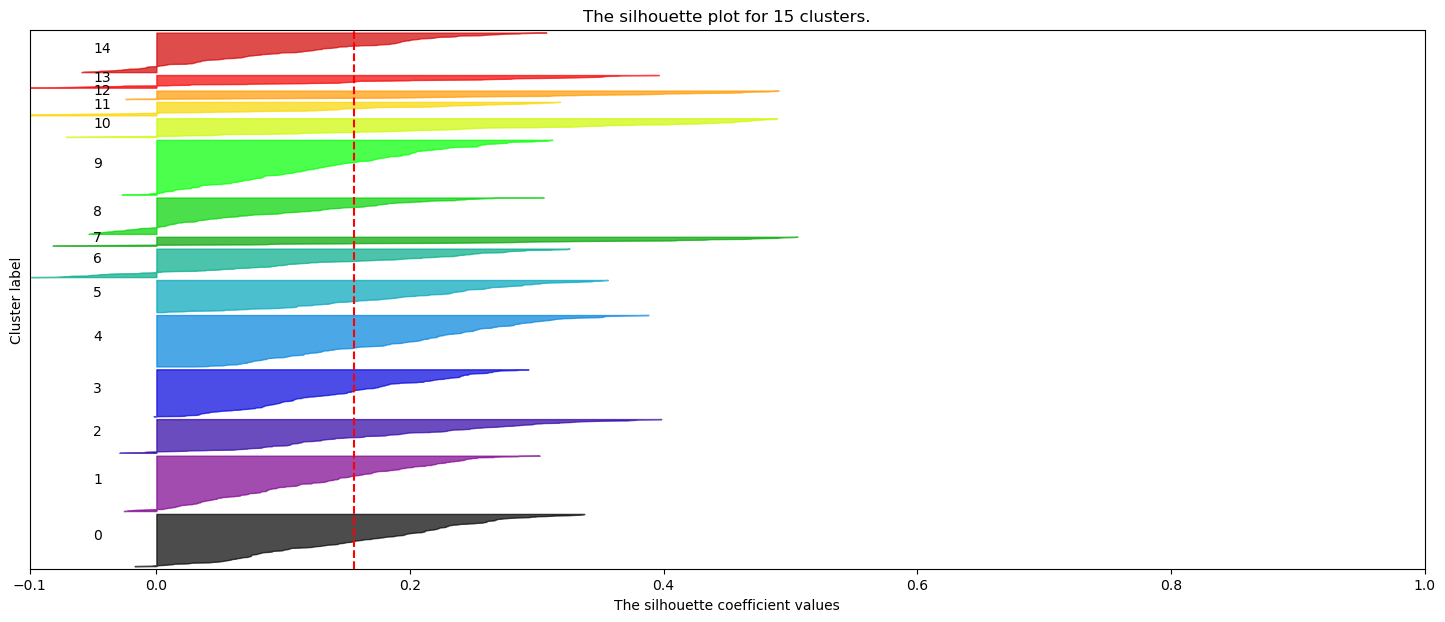

In [131]:
silh_n_clusters, silh_score = silhouette_analysis(df_to_cluster, 15)

In [132]:
silh_n_clusters, silh_score

(2, 0.3937883911433509)

## KMeans

In [24]:
kmeans = KMeans(n_clusters=silh_n_clusters, random_state=23, n_init='auto').fit(df_to_cluster)
kmeans.labels_

array([6, 7, 2, ..., 1, 1, 9])